<center>
    <img src="https://res.cloudinary.com/dqbwh5toy/image/upload/v1725014704/Handdrawn_Circle_Logo_mss9uw.png"
         alt="cognitiveclass.ai logo"
         style="width:50px; height:auto;">
</center>


## <font color='teal'> <font face="roboto" size="6"> **Introduction**
This analysis aims to understand customer churn by examining various features within a telecommunications dataset. I explore relationships between churn and several customer characteristics and behaviors, including tenure, monthly charges, and additional services. The goal is to uncover patterns that might indicate why customers are leaving and to identify potential areas for intervention.

By performing these analyses, we gain valuable insights into customer churn, enabling us to tailor strategies to retain customers more effectively. This comprehensive approach combines data preparation, feature engineering, and both univariate and multivariate analyses to uncover trends and patterns in the data.

This data is sourced  from [Kaggle Telco Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).




#<font color='teal'> <font face="roboto" size="5"> **IMPORTING TOOLS**

In [ ]:
#Importing tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


#<font color='teal'> <font face="roboto" size="5"> **DATA EXTRACTION**

In [ ]:
#Data Extraction/Collection
csv_file_path = r'/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(csv_file_path)

#<font color='teal'> <font face="roboto" size="5"> **DATA INGESTION AND CLEANING**

In [ ]:
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)        # Adjust the display width


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset contains a total number or 21 columns and 7043 rows
From this we can see that the dataset contains no missing columns.
Columns are in the right data types apart from TotalCharges colum

In [ ]:
# Converting Totalcharges column from object to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce').astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Display column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.describe()#(include= 'all')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


After conversion the TotalCharges has missing values as we can see from the Count.

In [ ]:
df.value_counts('InternetService')

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


The most used internet service is Fiber optic.

In [ ]:
df.value_counts('Contract')

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


The most prefereed Contract type is Month to month

In [ ]:
df.value_counts('PaymentMethod')

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


The most used Payment method is Electronic check.

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


TotalCharges column has 11 null values

<Figure size 1200x800 with 0 Axes>

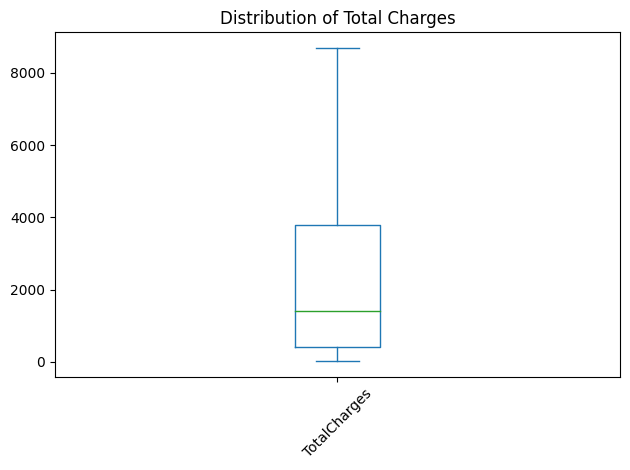

In [ ]:
# Cheking for outliers using Box plot in TotalChrages column
# There are no outlier valuence hence will replace the missing values with the mean
plt.figure(figsize=(12, 8))

df[['TotalCharges']].plot(kind='box')
plt.title('Distribution of Total Charges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the boxplot we can confirm that TotalCharges column has not outliers therefore it would be best fit to replace the missing values with the mean.

In [ ]:
# Replace NaN values with the column mean
TotalCharges_mean = df['TotalCharges'].mean()
df['TotalCharges'].fillna(TotalCharges_mean, inplace=True)

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# There are no duplicates
df.duplicated().sum()

0

In [ ]:
df = df.drop('customerID', axis=1)

In [ ]:
# Checking for unique values
for column in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                'PaperlessBilling','PaymentMethod', 'Churn']:
    print(f"{column} unique values: {df[column].unique()}")


gender unique values: ['Female' 'Male']
Partner unique values: ['Yes' 'No']
Dependents unique values: ['No' 'Yes']
PhoneService unique values: ['No' 'Yes']
MultipleLines unique values: ['No phone service' 'No' 'Yes']
InternetService unique values: ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values: ['No' 'Yes' 'No internet service']
OnlineBackup unique values: ['Yes' 'No' 'No internet service']
DeviceProtection unique values: ['No' 'Yes' 'No internet service']
TechSupport unique values: ['No' 'Yes' 'No internet service']
StreamingTV unique values: ['No' 'Yes' 'No internet service']
StreamingMovies unique values: ['No' 'Yes' 'No internet service']
Contract unique values: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling unique values: ['Yes' 'No']
PaymentMethod unique values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn unique values: ['No' 'Yes']


In [ ]:
# remove (automatic) from payment method names
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

###<font color='black'> <font face="roboto" size="4"> ***Filtering categorical columns***

In [ ]:
# List of categorical columns to test against 'Churn'
from scipy.stats import chi2_contingency
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                       'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

# Function to perform Chi-Square test
def chi_square_test(data, col):
    contingency_table = pd.crosstab(data[col], data['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p

# Apply Chi-Square test on each categorical column
results = {col: chi_square_test(df, col) for col in categorical_columns}

# Filter significant results (p-value < 0.05)
significant_results = {k: v for k, v in results.items() if v < 0.05}

# Display results in a formatted table
print("Significant Associations with Churn:")
print(f"{'Variable':<20} {'P-Value':<30}")
print("-" * 50)
for variable, p_value in significant_results.items():
    print(f"{variable:<20} {p_value:<30.2e}")


Significant Associations with Churn:
Variable             P-Value                       
--------------------------------------------------
SeniorCitizen        1.51e-36                      
Partner              2.14e-36                      
Dependents           4.92e-43                      
MultipleLines        3.46e-03                      
InternetService      9.57e-160                     
OnlineSecurity       2.66e-185                     
OnlineBackup         2.08e-131                     
DeviceProtection     5.51e-122                     
TechSupport          1.44e-180                     
StreamingTV          5.53e-82                      
StreamingMovies      2.67e-82                      
Contract             5.86e-258                     
PaperlessBilling     4.07e-58                      
PaymentMethod        3.68e-140                     


Gender and PhoneServices columns have no significant correlation with Churn

In [ ]:
df = df.drop(columns=['gender','PhoneService'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   MultipleLines     7043 non-null   object 
 5   InternetService   7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  PaperlessBilling  7043 non-null   object 
 14  PaymentMethod     7043 non-null   object 
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   float64


#<font color='Teal'> <font face="roboto" size="5"> **VISUALIZATIONS AND ANALYSIS**

#<font color='teal'> <font face="roboto" size="5"> **UNIVARIATE & BIVARIATE ANALYSIS**




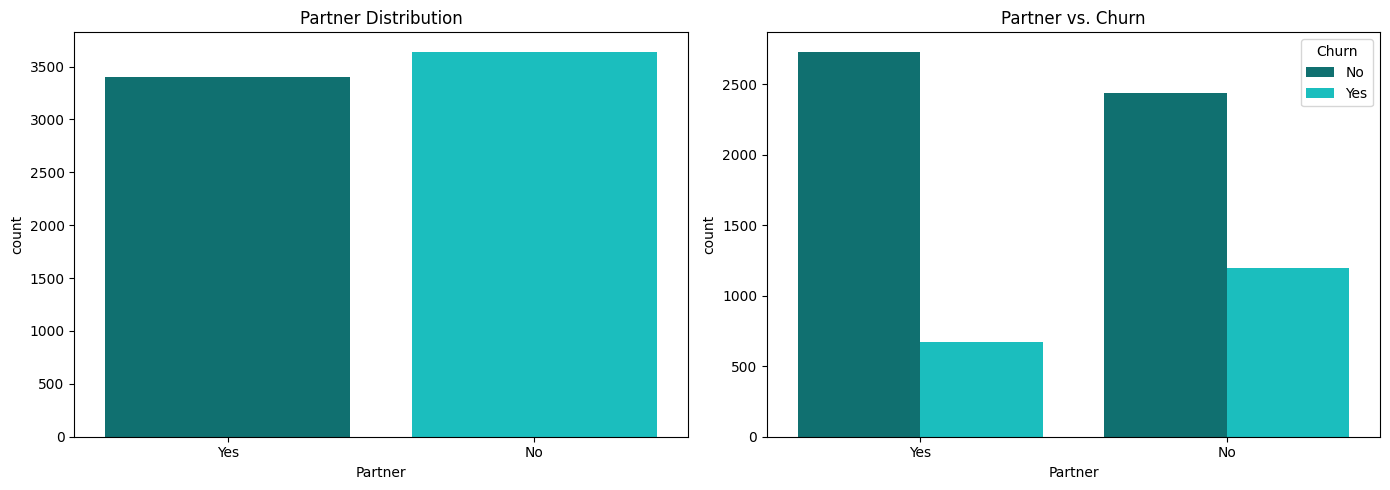

In [ ]:
teal_palette = ['#008080',  '#00D9D9']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Overall distribution of Partner without hue
sns.countplot(x='Partner', hue='Partner', data=df, ax=axes[0], palette= teal_palette,
              legend=False)
axes[0].set_title('Partner Distribution')

# Plot 2: Partner distribution vs. Churn
sns.countplot(x='Partner', hue='Churn', data=df, ax=axes[1], palette= teal_palette)
axes[1].set_title('Partner vs. Churn')

# Show plots
plt.tight_layout()
plt.show()



Customers with no partners are slightly.

Customers with no partners have a higher likelyhood of churning as compared to those that have.

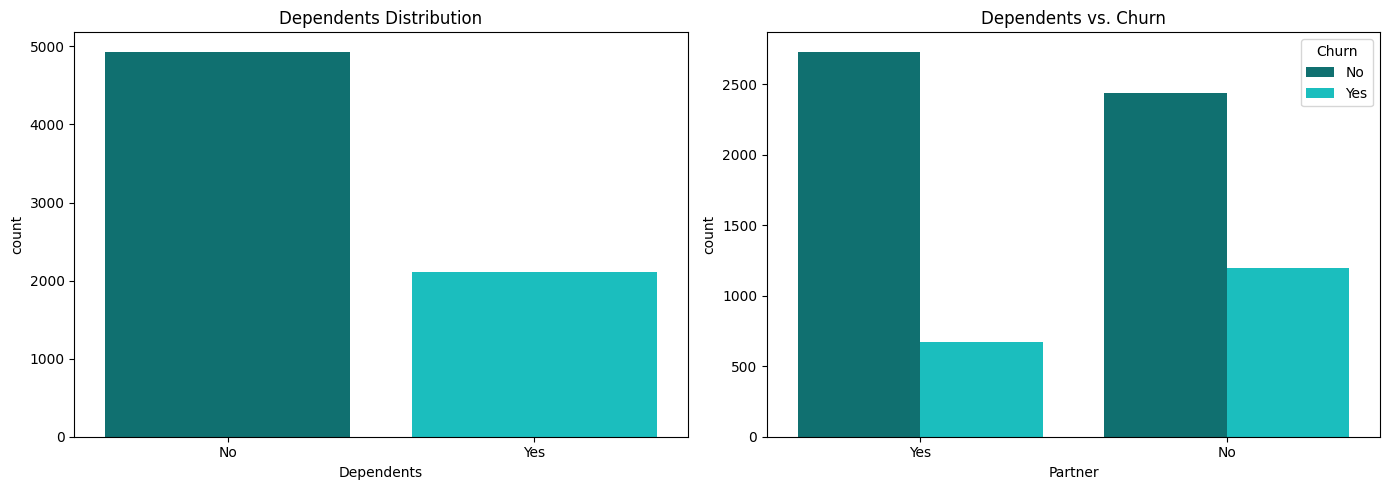

In [ ]:
teal_palette = ['#008080',  '#00D9D9']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Overall distribution of Partner without hue
sns.countplot(x='Dependents', hue='Dependents', data=df, ax=axes[0],
              palette= teal_palette, legend=False)
axes[0].set_title('Dependents Distribution')

# Plot 2: Partner distribution vs. Churn
sns.countplot(x='Partner', hue='Churn', data=df, ax=axes[1], palette= teal_palette)
axes[1].set_title('Dependents vs. Churn')

# Show plots
plt.tight_layout()
plt.show()


The number of customers with no dependents is higher compare to those that have.

They also have a higher churn rate.

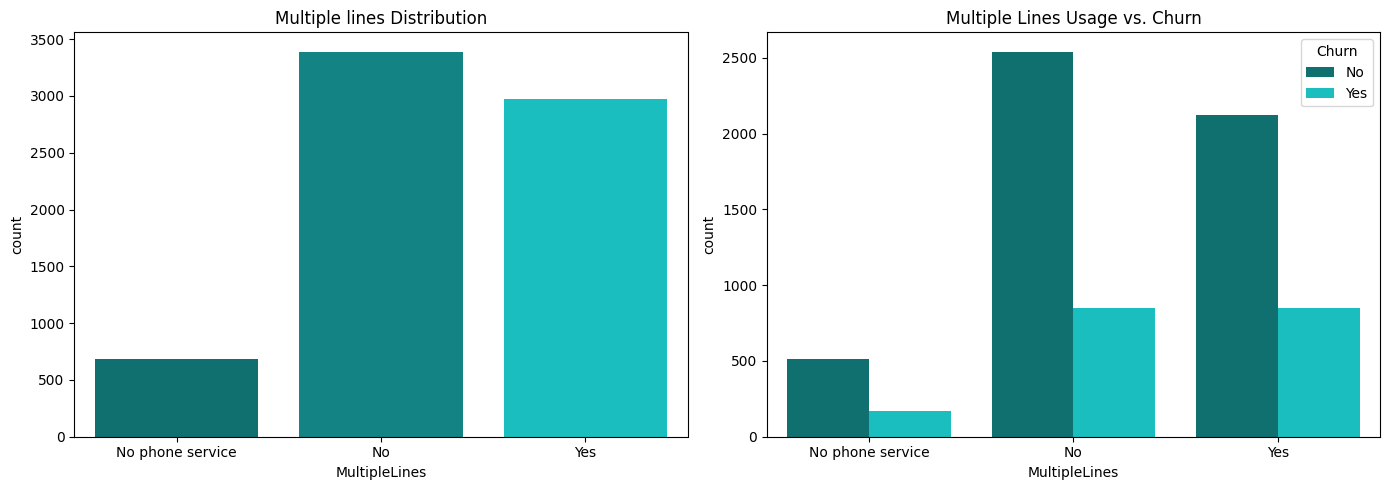

In [ ]:
teal_palette = ['#008080',  '#009696', '#00D9D9']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Overall distribution of Partner without hue
sns.countplot(x='MultipleLines', hue='MultipleLines', data=df, ax=axes[0],
              palette=teal_palette, legend=False)
axes[0].set_title('Multiple lines Distribution')

teal_palette1 = ['#008080',  '#00D9D9']
# Plot 2: Partner distribution vs. Churn
sns.countplot(x='MultipleLines', hue='Churn', data=df, ax=axes[1], palette= teal_palette1)
axes[1].set_title('Multiple Lines Usage vs. Churn')

# Show plots
plt.tight_layout()
plt.show()


Customers with no multiples lines are slightly higher than the rest.

There is no significant difference in the churn rate between those who have multiple lines with those who don't

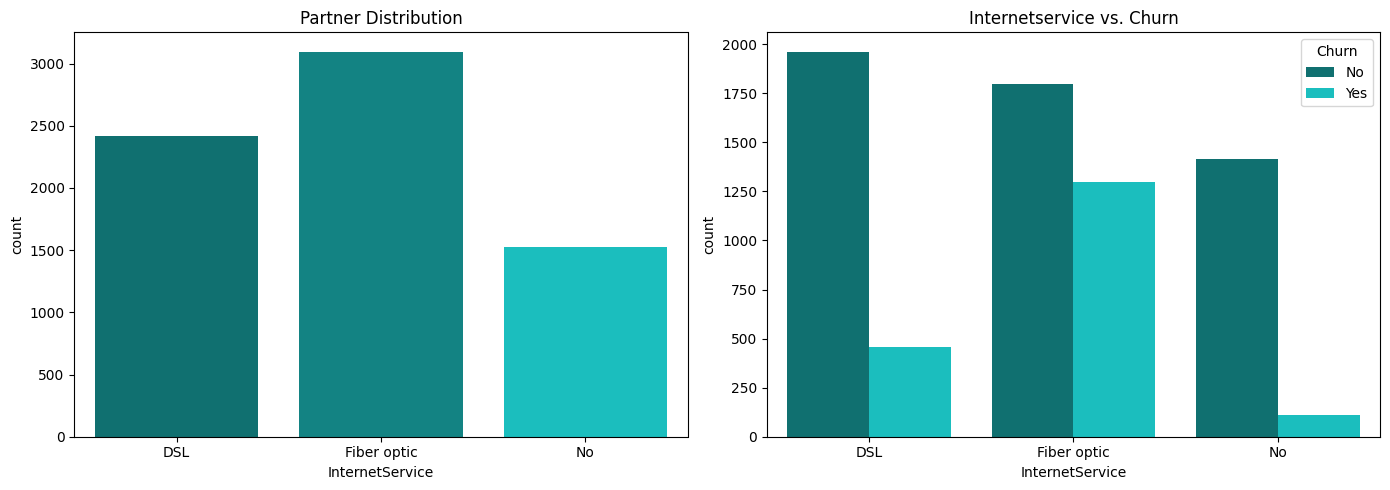

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Overall distribution of Partner without hue
sns.countplot(x='InternetService', hue='InternetService', data=df, ax=axes[0],
              palette= teal_palette, legend=False)
axes[0].set_title('Partner Distribution')

# Plot 2: Partner distribution vs. Churn
teal_palette1 = ['#008080',  '#00D9D9']
sns.countplot(x='InternetService', hue='Churn', data=df, ax=axes[1], palette= teal_palette1)
axes[1].set_title('Internetservice vs. Churn')

# Show plots
plt.tight_layout()
plt.show()


Although the Fibre Optic Internet service is more preffered, it has a very high churn rate.

In [ ]:
from scipy.stats import ttest_ind

# Filter the dataset for DSL and Fiber Optic services
dsl_fiber_df = df[df['InternetService'].isin(['DSL', 'Fiber optic'])]

# Descriptive statistics of pricing
dsl_stats = dsl_fiber_df[dsl_fiber_df['InternetService'] == 'DSL']['MonthlyCharges'].describe()
fiber_stats = dsl_fiber_df[dsl_fiber_df['InternetService'] == 'Fiber optic']['MonthlyCharges'].describe()

print("DSL Pricing Statistics:\n", dsl_stats)
print("\nFiber Optic Pricing Statistics:\n", fiber_stats)

DSL Pricing Statistics:
 count    2421.000000
mean       58.102169
std        16.259522
min        23.450000
25%        46.200000
50%        56.150000
75%        69.900000
max        94.800000
Name: MonthlyCharges, dtype: float64

Fiber Optic Pricing Statistics:
 count    3096.000000
mean       91.500129
std        12.663039
min        67.750000
25%        80.550000
50%        91.675000
75%       101.150000
max       118.750000
Name: MonthlyCharges, dtype: float64


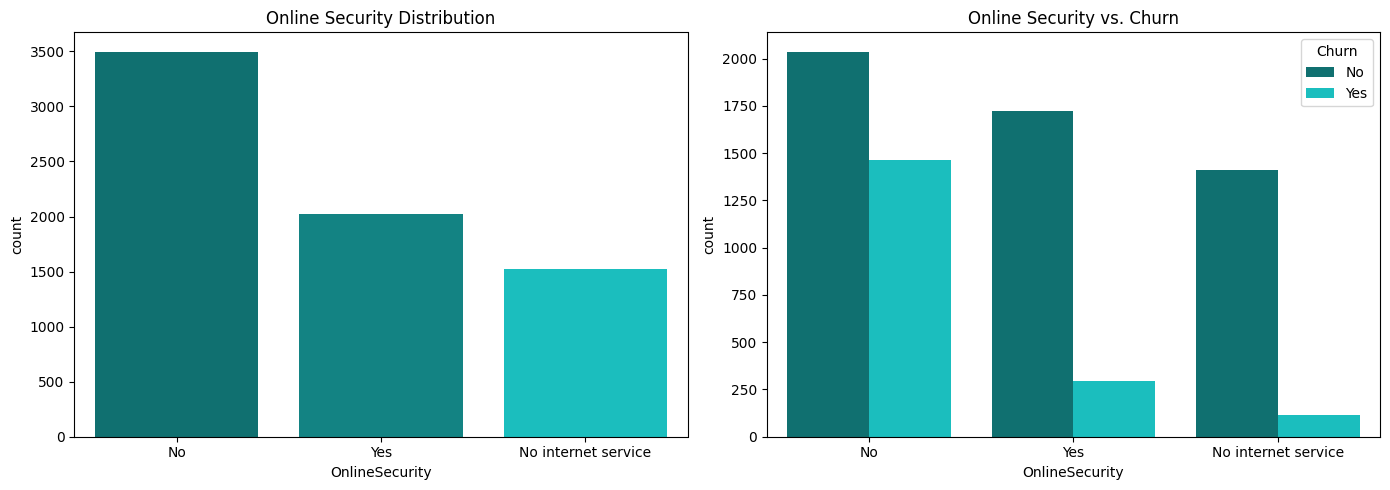

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Overall distribution of Partner without hue
sns.countplot(x='OnlineSecurity', hue='OnlineSecurity', data=df, ax=axes[0],
              palette=teal_palette, legend=False)
axes[0].set_title('Online Security Distribution')

# Plot 2: Partner distribution vs. Churn
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, ax=axes[1], palette=teal_palette1)
axes[1].set_title('Online Security vs. Churn')

# Show plots
plt.tight_layout()
plt.show()


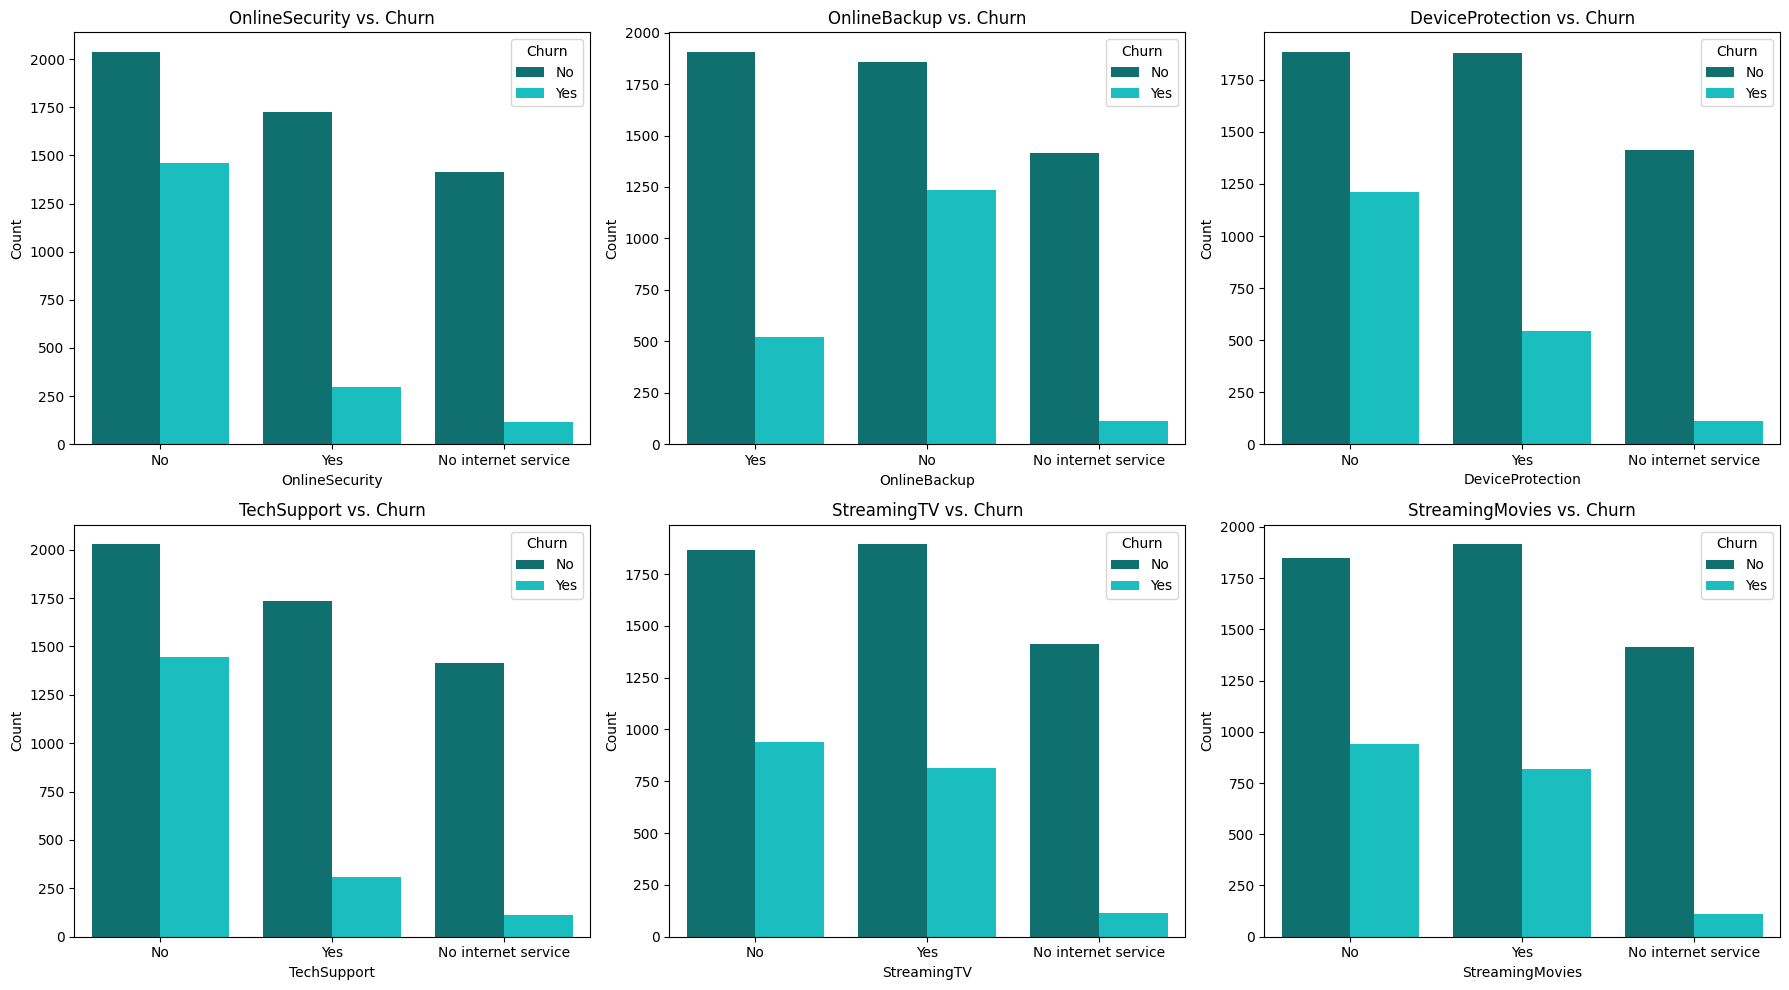

In [ ]:
# List of services to analyze
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies']

# Create the TotalServices column
df['TotalServices'] = df[services].apply(lambda x: sum(x == 'Yes'), axis=1)

# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot each service vs. Churn
for i, service in enumerate(services):
    sns.countplot(x=service, hue='Churn', data=df, ax=axes[i], palette=teal_palette1)
    axes[i].set_title(f'{service} vs. Churn')
    axes[i].set_xlabel(service)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


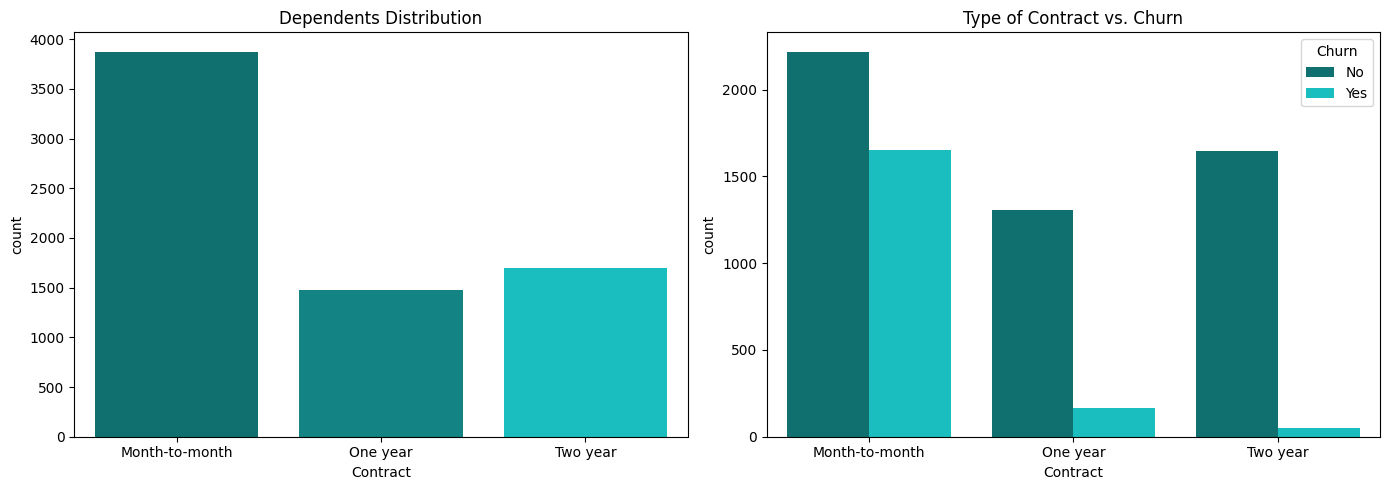

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Overall distribution of Partner without hue
sns.countplot(x='Contract', hue='Contract', data=df, ax=axes[0],
              palette= teal_palette, legend=False)
axes[0].set_title('Dependents Distribution')

# Plot 2: Partner distribution vs. Churn
sns.countplot(x='Contract', hue='Churn', data=df, ax=axes[1], palette= teal_palette1)
axes[1].set_title('Type of Contract vs. Churn')

# Show plots
plt.tight_layout()
plt.show()

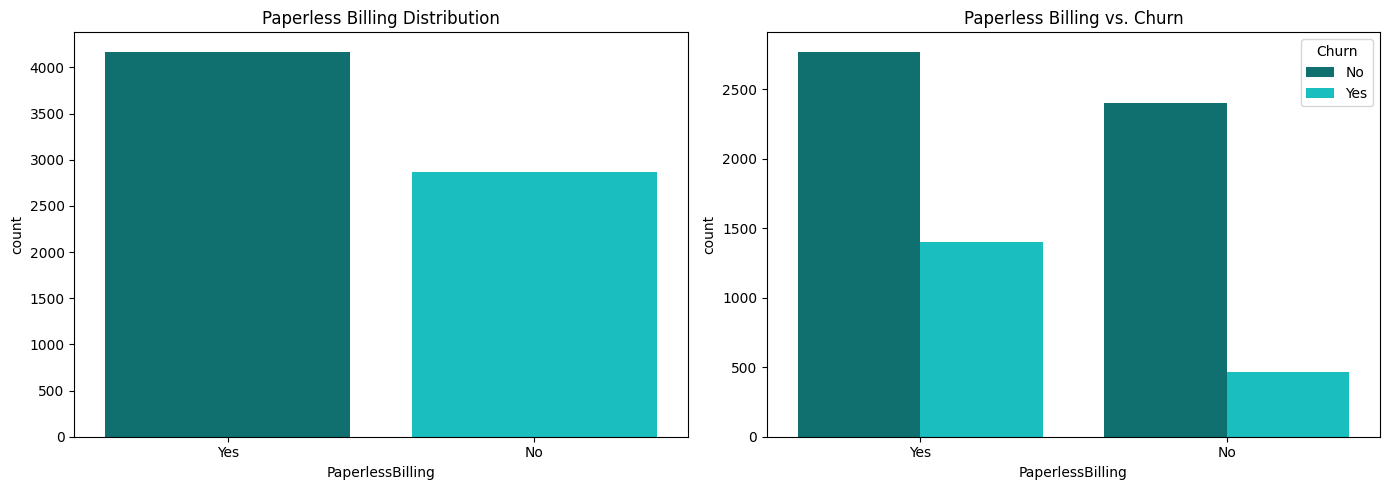

In [ ]:
teal_palette = ['#008080',  '#00D9D9']
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Overall distribution of Partner without hue
sns.countplot(x='PaperlessBilling', hue='PaperlessBilling', data=df, ax=axes[0],
              palette=teal_palette, legend=False)
axes[0].set_title('Paperless Billing Distribution')

# Plot 2: Partner distribution vs. Churn
sns.countplot(x='PaperlessBilling', hue='Churn', data=df, ax=axes[1], palette=teal_palette)
axes[1].set_title('Paperless Billing vs. Churn')

# Show plots
plt.tight_layout()
plt.show()

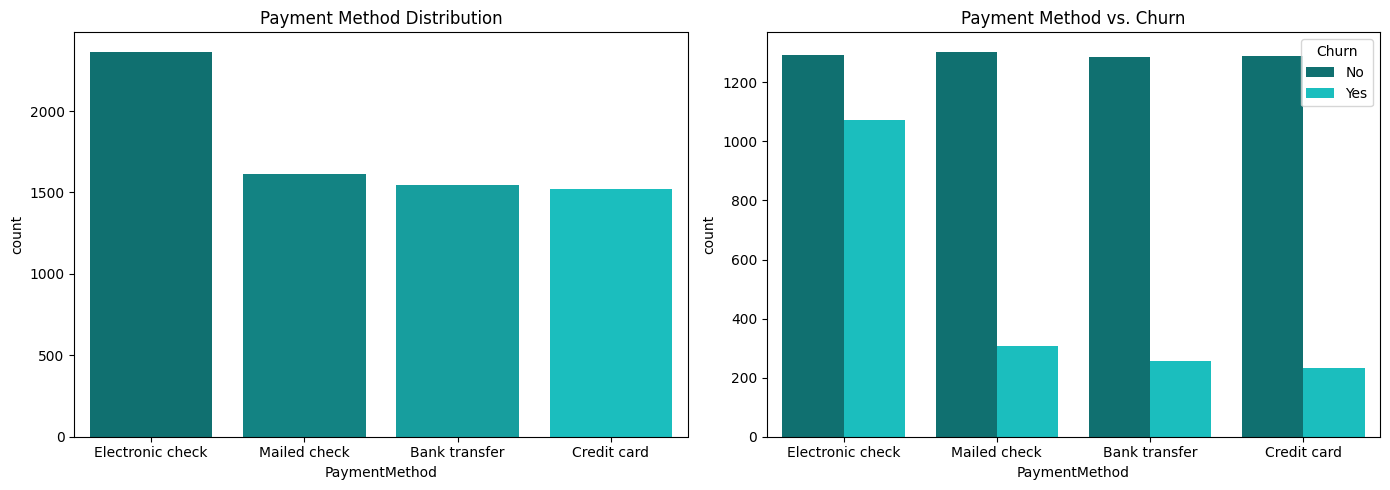

In [ ]:
# Create subplots
teal_palette = ['#008080', '#009696', '#00B5B5','#00D9D9']
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Overall distribution of Partner without hue
sns.countplot(x='PaymentMethod', hue='PaymentMethod', data=df, ax=axes[0],
              palette= teal_palette, legend=False)
axes[0].set_title('Payment Method Distribution')

# Plot 2: Partner distribution vs. Churn
teal_palette1 = ['#008080',  '#00D9D9']
sns.countplot(x='PaymentMethod', hue='Churn', data=df, ax=axes[1], palette= teal_palette1)
axes[1].set_title('Payment Method vs. Churn')

# Show plots
plt.tight_layout()
plt.show()

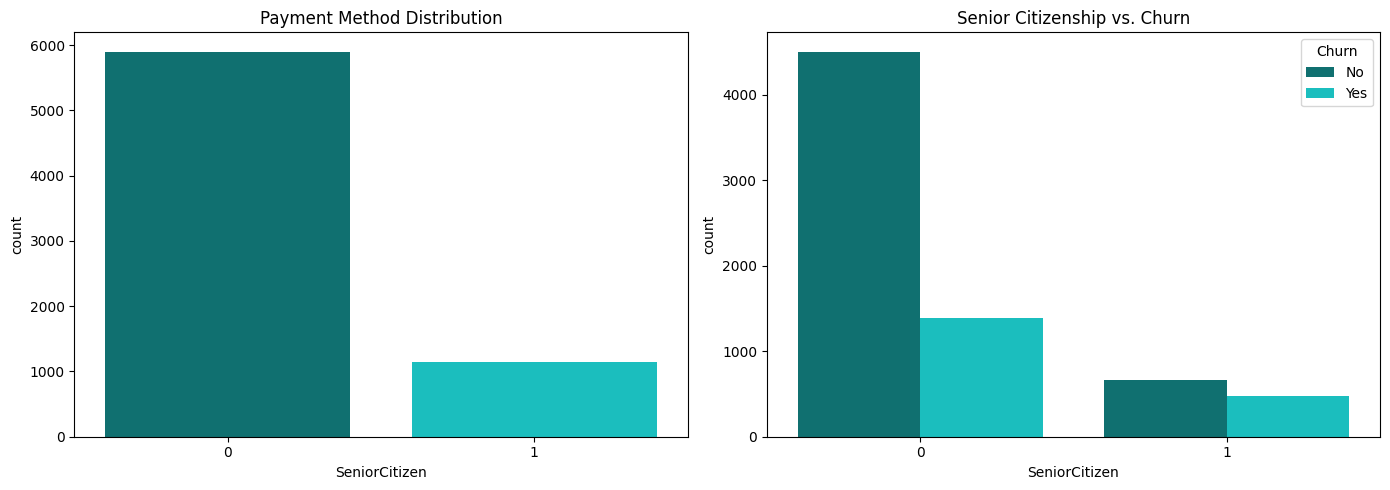

In [ ]:
teal_palette = ['#008080',  '#00D9D9']
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Overall distribution of Partner without hue
sns.countplot(x='SeniorCitizen', hue='SeniorCitizen', data=df, ax=axes[0],
              palette= teal_palette, legend=False)
axes[0].set_title('Payment Method Distribution')

# Plot 2: Partner distribution vs. Churn
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, ax=axes[1], palette= teal_palette)
axes[1].set_title('Senior Citizenship vs. Churn')

# Show plots
plt.tight_layout()
plt.show()

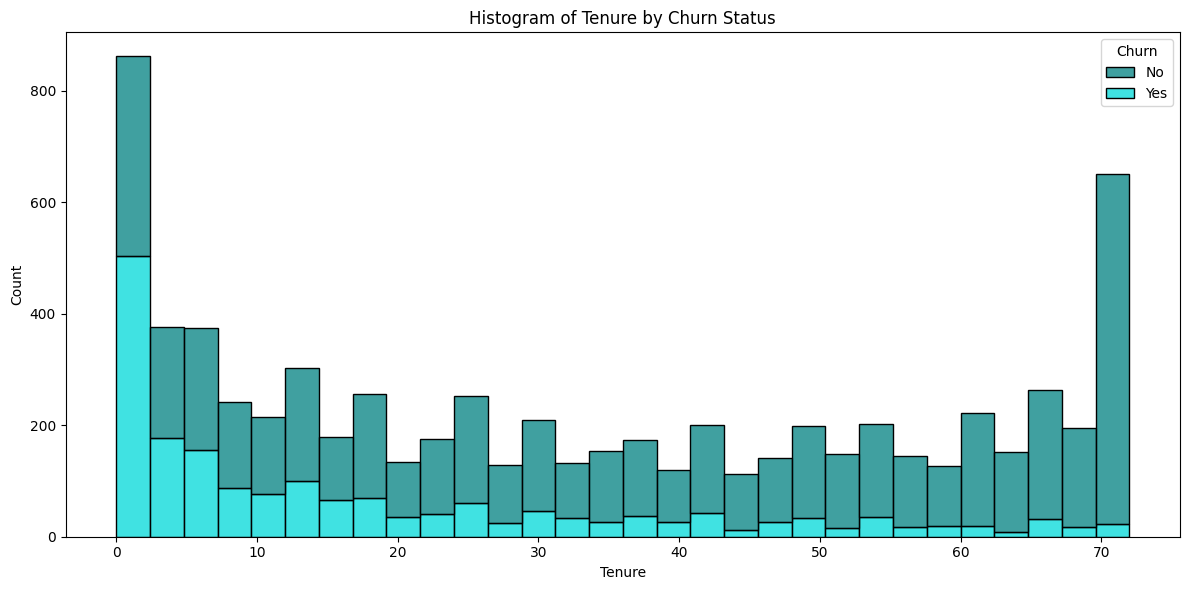

In [ ]:
teal_palette = ['#008080','#00D9D9']
# Create the histogram plot
plt.figure(figsize=(12, 6))

# Histogram of Tenure by Churn status
sns.histplot(data=df, x='tenure', multiple='stack', palette = teal_palette, hue = 'Churn',  bins=30)

# Add titles and labels
plt.title('Histogram of Tenure by Churn Status')
plt.xlabel('Tenure')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()



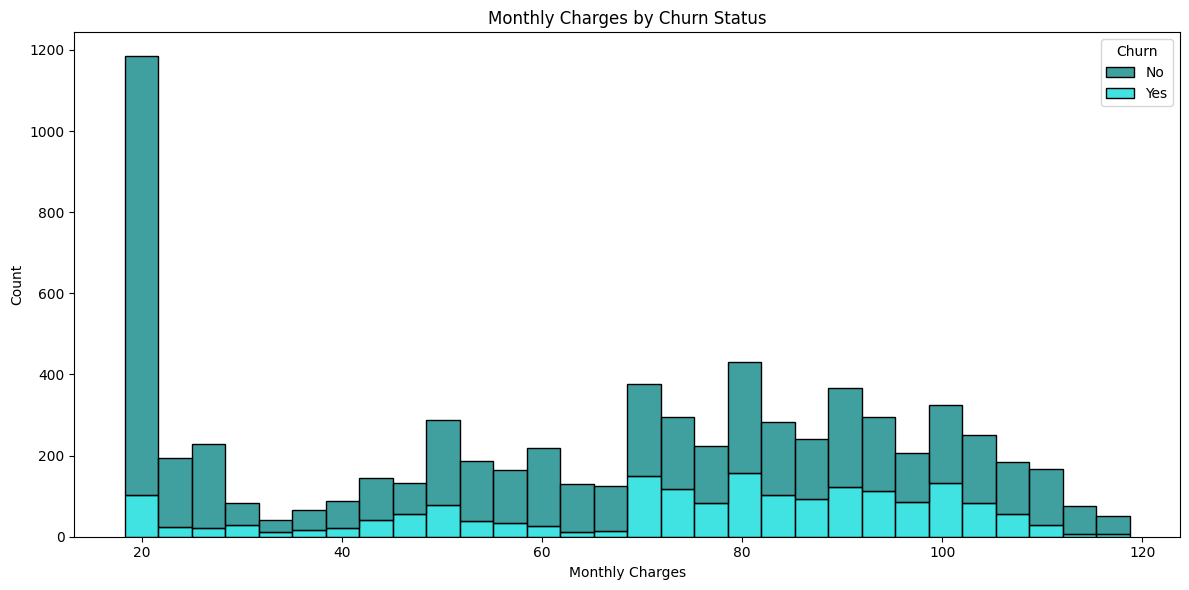

In [ ]:
teal_palette = ['#008080','#00D9D9']

# Create the histogram plot
plt.figure(figsize=(12, 6))

# Histogram of Tenure by Churn status
sns.histplot(data=df, x='MonthlyCharges', hue= 'Churn', multiple='stack',
             palette = teal_palette, bins=30)

# Add titles and labels
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()

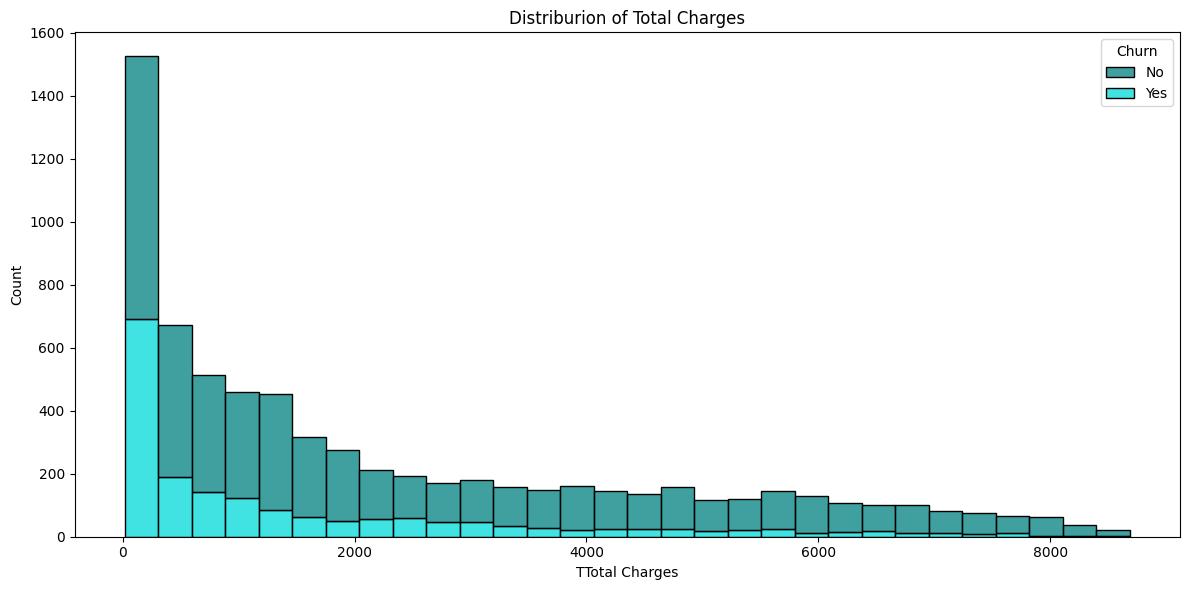

In [ ]:
teal_palette = ['#008080','#00D9D9']

# Create the histogram plot
plt.figure(figsize=(12, 6))

# Histogram of Tenure by Churn status
sns.histplot(data=df, x='TotalCharges', hue= 'Churn', multiple='stack',
             palette = teal_palette, bins=30)

# Add titles and labels
plt.title('Distriburion of Total Charges')
plt.xlabel('TTotal Charges')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Display the numeric columns
print("Numeric Columns:", numeric_columns)


Numeric Columns: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'TotalServices'], dtype='object')


In [ ]:
encoder = LabelEncoder()
df['Churn'] = encoder.fit_transform(df['Churn'])
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalServices
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,2
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,0,3
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0


#<font color='teal'> <font face="roboto" size="5"> **MULTIVARIATE ANALYSIS**

In [ ]:
# Select numeric columns
numeric_df = df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
                 'Churn','TotalServices']]


In [ ]:
corr = numeric_df.corr()


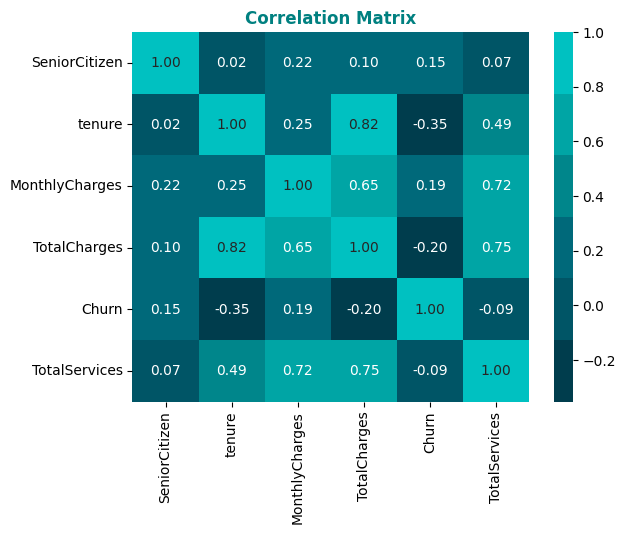

In [ ]:
# Correlation Matrix
teal_palette = ['#003D4D', '#005566', '#00697A', '#00868B', '#00A5A5',
                '#00C1C1']#, '#00CDCD', '#00E5E5','#00FFFF']
sns.heatmap(corr, annot=True, cmap=teal_palette, fmt='.2f')

plt.title('Correlation Matrix', color='teal', fontweight='bold')

plt.show()

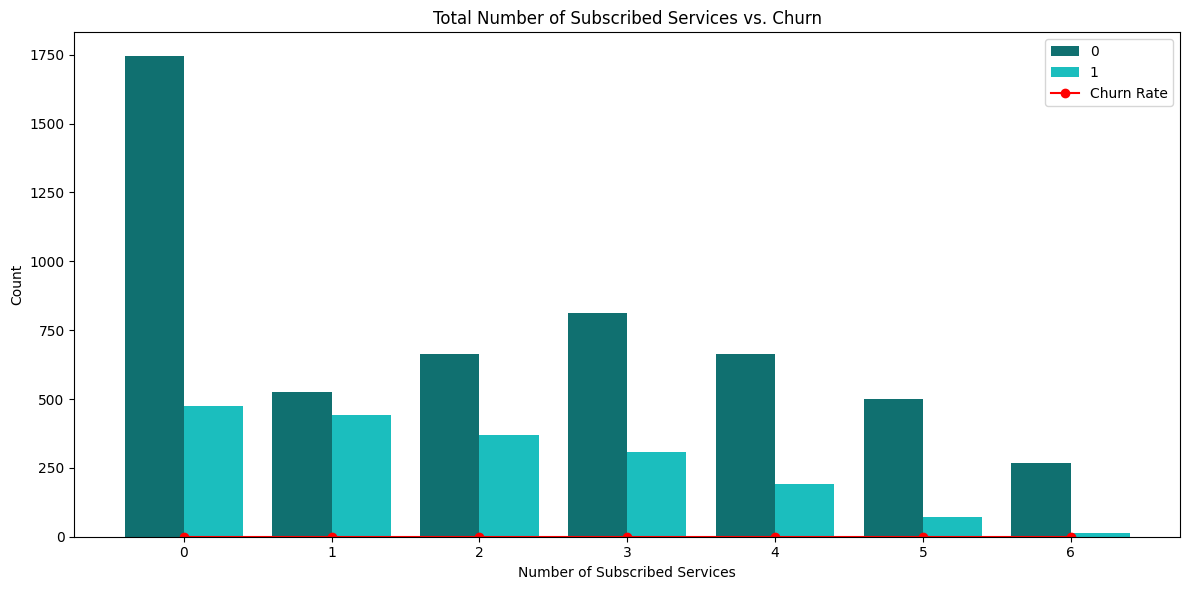

In [ ]:
teal_palette = ['#008080','#00D9D9']

# Create the bar plot showing the count of churn and non-churn customers by TotalServices
plt.figure(figsize=(12, 6))
sns.countplot(x='TotalServices', hue='Churn', data=df, palette= teal_palette)

# Calculate the churn rate for each level of TotalServices
churn_rate = df.groupby('TotalServices')['Churn'].apply(lambda x: (x == 'Yes').mean())

# Plot the churn rate as a line graph
plt.plot(churn_rate.index, churn_rate.values * df['TotalServices'].value_counts(),
         color='red', marker='o', label='Churn Rate')

# Adding titles and labels
plt.title('Total Number of Subscribed Services vs. Churn')
plt.xlabel('Number of Subscribed Services')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

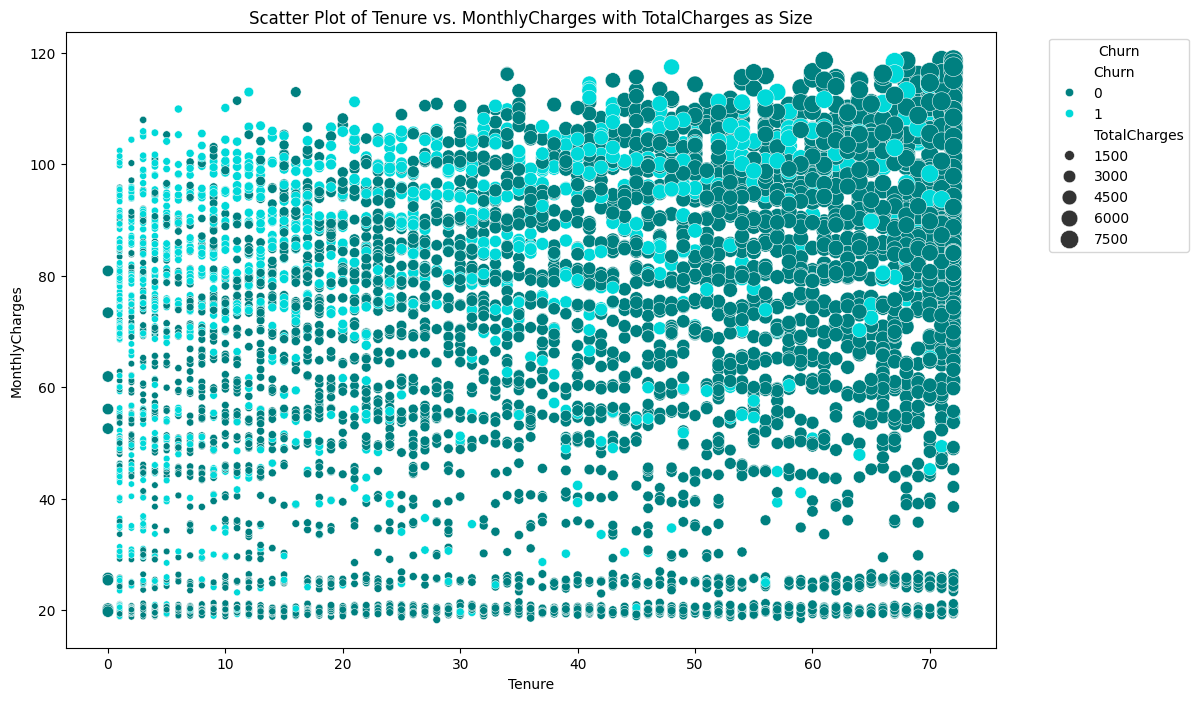

In [ ]:
teal_palette = ['#008080','#00D9D9']

# Create a scatter plot with size representing 'TotalCharges'
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tenure', y='MonthlyCharges', size='TotalCharges',
                hue='Churn', data=df, palette= teal_palette, sizes=(20, 200))
plt.title('Scatter Plot of Tenure vs. MonthlyCharges with TotalCharges as Size')
plt.xlabel('Tenure')
plt.ylabel('MonthlyCharges')
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#<font color='teal'> <font face="roboto" size="5"> **FEATURE ENGINEERING**

In [ ]:
#Average Transaction Value
df['AverageTransactionValue'] = df['TotalCharges'] / (df['tenure'] + 1)
AverageTransactionValue = df['AverageTransactionValue']
AverageTransactionValue.describe()

,AverageTransactionValue
count,7043.000000
mean,62.556926
std,92.980226
min,9.183333
25%,26.274411
50%,61.150000
75%,84.940047
max,2283.300441


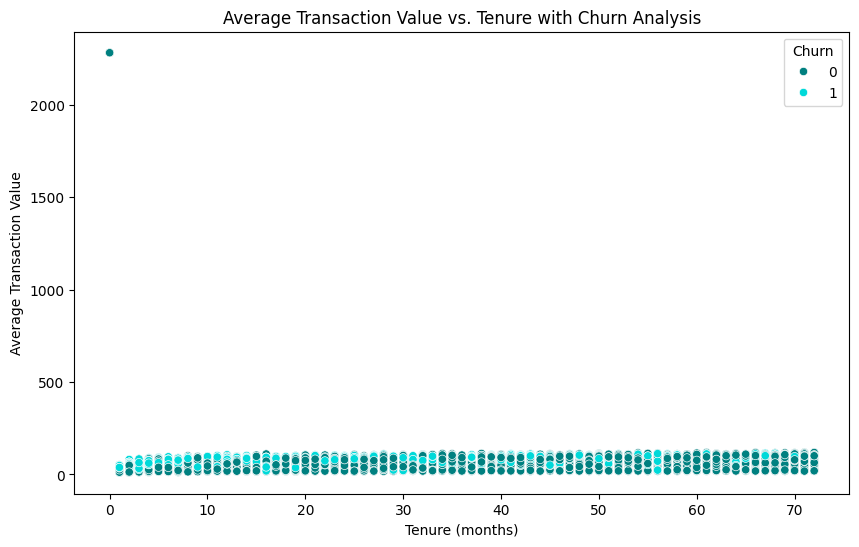

In [ ]:
teal_palette = ['#008080','#00D9D9']

# AverageTransactionValue vs Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='AverageTransactionValue', hue='Churn', data=df, palette = teal_palette)
plt.title('Average Transaction Value vs. Tenure with Churn Analysis')
plt.xlabel('Tenure (months)')
plt.ylabel('Average Transaction Value')
plt.show()




In [ ]:
#Frequency of Customer Service Interactions
interaction_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport']

#frequency of customer service interactions
df['CustomerServiceInteractions'] = df[interaction_columns].apply(lambda x: sum(x == 'Yes'), axis=1)


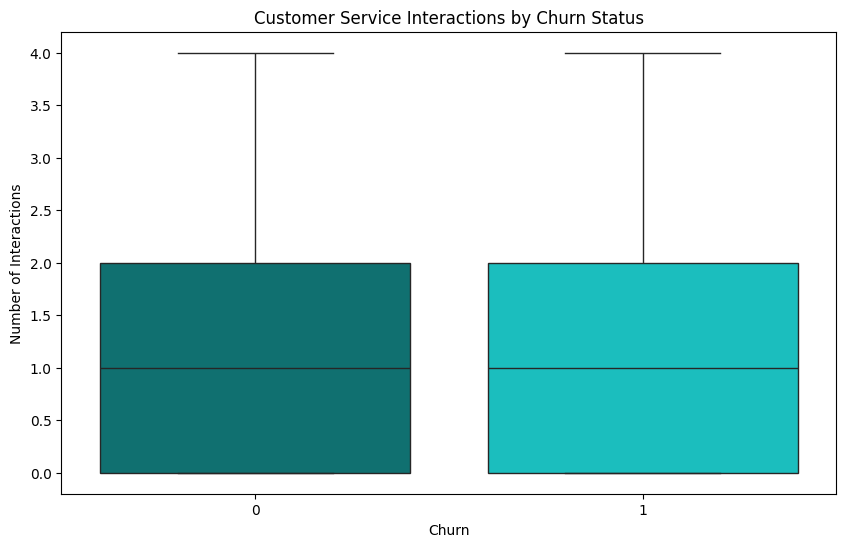

In [ ]:
# CustomerServiceInteractions by Churn status
teal_palette = ['#008080','#00D9D9']
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='CustomerServiceInteractions', hue='Churn', data=df, palette= teal_palette, dodge=False, legend=False)
plt.title('Customer Service Interactions by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Number of Interactions')
plt.show()



The similar levels in the box plots indicate that the number of customer service interactions is not significantly different between churned and non-churned customers. This means the frequency of interactions alone does not distinguish between those who churn and those who stay.

This could imply that frequent interactions with customer service do not necessarily correlate with dissatisfaction or loyalty. Both churned and retained customers are interacting at similar rates

In [ ]:
# Calculate the maximum tenure
max_tenure = df['tenure'].max()
print(f'maximum tenure is',max_tenure)

# Define bin edges, ensuring they are unique and ordered
bin_edges = [0, 12, 24, 36, 48, 60, 72,84, max_tenure]
unique_bin_edges = sorted(set(bin_edges))  # Remove duplicates and sort

# Define labels for bins (one less than the number of bins)
labels = ['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years',
          '5-6 Years', f'6+ Years']

# Create a new feature for tenure categories
df['TenureCategory'] = pd.cut(df['tenure'], bins=unique_bin_edges, labels=labels, right=False)

#df.TenureCategory
# Calculate the count of people in each tenure category
tenure_category_counts = df['TenureCategory'].value_counts()

print(tenure_category_counts)




maximum tenure is 72
TenureCategory
0-1 Year     2069
5-6 Years    1121
1-2 Years    1047
2-3 Years     876
4-5 Years     820
3-4 Years     748
6+ Years      362
Name: count, dtype: int64


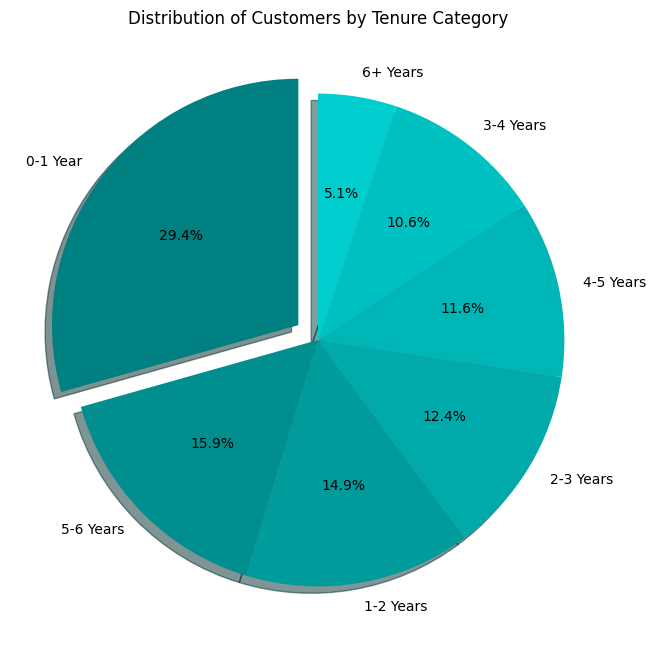

In [ ]:
teal_palette = ['#008080',  '#008E8E',  '#009B9B',
                '#00AAAA',  '#00B5B5',  '#00C1C1',
                '#00CDCD' ]

explode = [0.1,0,0,0,0,0,0]
# Pie chart of TenureCategory distribution
plt.figure(figsize=(8, 8))
plt.pie(tenure_category_counts, labels=tenure_category_counts.index, autopct='%1.1f%%',
        explode = explode, shadow = True, startangle=90, colors=teal_palette)
plt.title('Distribution of Customers by Tenure Category')
plt.show()


**High New Customer Acquisition:**

A large number of customers in the "0-1 Year" category suggests that your company is successfully acquiring new customers.

**Low Customer Retention:**

While many new customers are joining, the dominance of the "0-1 Year" group could also signal challenges in retaining customers beyond the first year. This could point to high churn rates, meaning many customers are leaving before becoming long-term users.

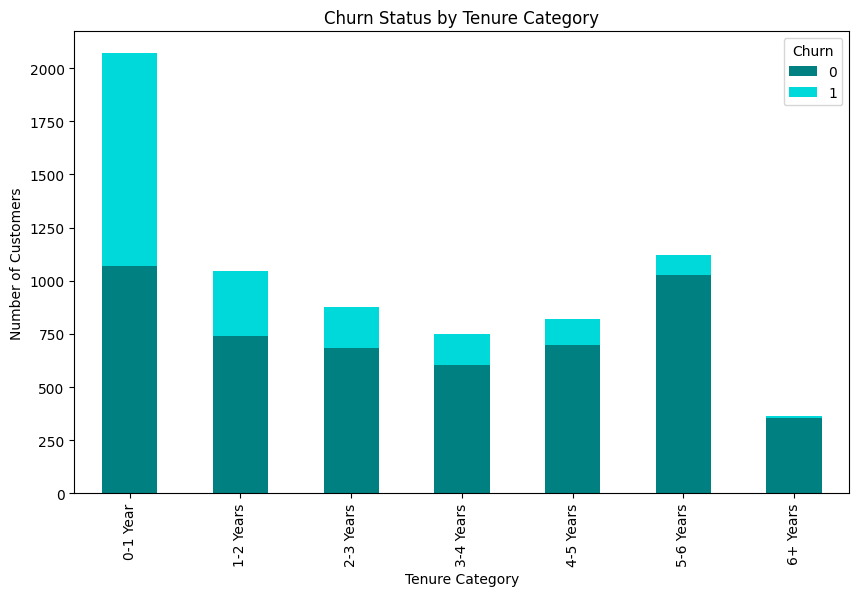

In [ ]:
teal_palette = ['#008080', '#00D9D9']

# Group by TenureCategory and Churn status, then get counts
churn_by_tenure = df.groupby(['TenureCategory', 'Churn'], observed = False).size().unstack()

# Plot the data with stacked bars
churn_by_tenure.plot(kind='bar', stacked=True, figsize=(10, 6), color=teal_palette)

# Add titles and labels
plt.title('Churn Status by Tenure Category')
plt.xlabel('Tenure Category')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()



a significant proportion of new customers are leaving within their first year. While the lonngest staying customers have a very minimal churn rate

In [ ]:
# Customer Lifetime Value (CLV)
df['CustomerLifetimeValue'] = df['MonthlyCharges'] * df['tenure']


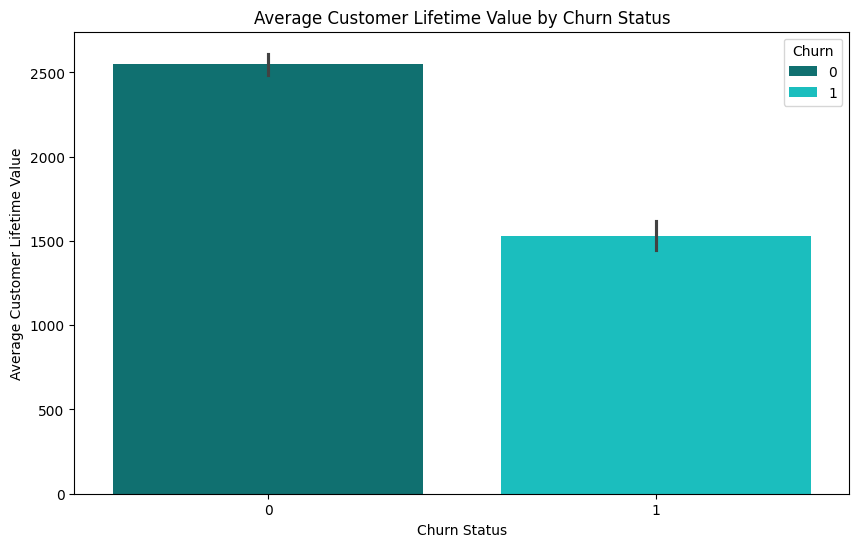

In [ ]:
# Customer Lifetime Value by Churn Status
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn', y='CustomerLifetimeValue', data=df, hue = 'Churn', palette= teal_palette)
plt.title('Average Customer Lifetime Value by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average Customer Lifetime Value')
plt.show()


Non-churned (retained) customers are more valuable on average because they stay longer and generate more revenue over their lifetime. This higher CLV indicates that these customers contribute more to your business’s revenue and profitability.

In [ ]:
#Churn Rate by Tenure
tenure_churn_rate = df.groupby('TenureCategory',observed=False)['Churn'].apply(lambda x: (x == 'Yes').mean())
df['TenureChurnRate'] = df['TenureCategory'].map(tenure_churn_rate)


In [ ]:
# Total Charges per Month
df['TotalChargesPerMonth'] = df['TotalCharges'] / (df['tenure'] + 1)


In [ ]:
# Monthly Charges to Tenure Ratio
df['MonthlyChargesToTenureRatio'] = df['MonthlyCharges'] / (df['tenure'] + 1)  # Adding 1 to avoid division by zero


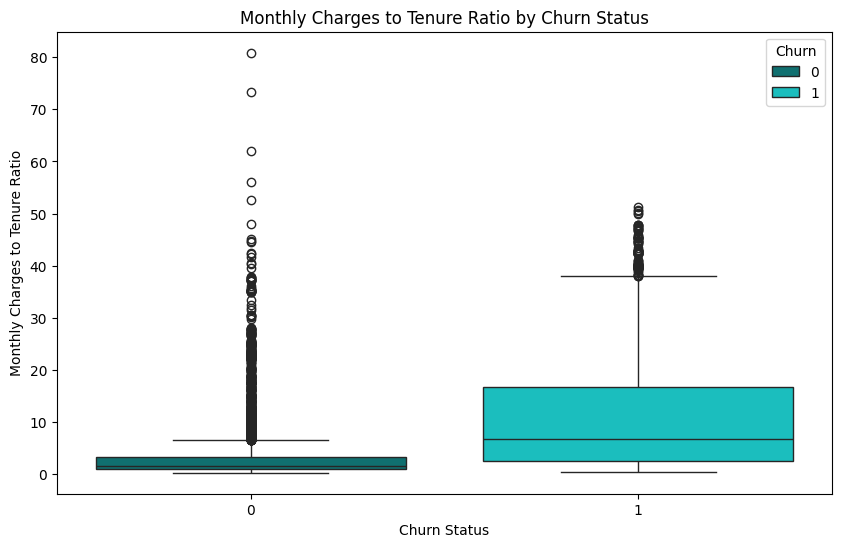

In [ ]:
teal_palette = ['#008080',  '#00D9D9']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyChargesToTenureRatio', data=df, palette = teal_palette, hue='Churn', dodge=False)
plt.title('Monthly Charges to Tenure Ratio by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges to Tenure Ratio')
plt.show()


Customers who churn have a higher ratio, indicating that they are spending more relative to the length of time they've been with the company. This could suggest that these customers might be paying a lot in a shorter amount of time, possibly due to higher monthly charges or lower tenure.

In [ ]:
# combine these features into a DataFrame
feature_df = df[['AverageTransactionValue', 'CustomerServiceInteractions', 'TenureCategory',
                 'CustomerLifetimeValue', 'TenureChurnRate', 'TotalChargesPerMonth',
                 'MonthlyChargesToTenureRatio', 'Churn']]


**Encoding**

In [ ]:
df_encoded = pd.get_dummies(df[[ 'SeniorCitizen','Partner', 'Dependents',
                                'MultipleLines', 'InternetService', 'OnlineSecurity',
                                 'OnlineBackup','DeviceProtection', 'TechSupport',
                                 'StreamingTV', 'StreamingMovies', 'Contract',
                                 'PaperlessBilling', 'PaymentMethod']], drop_first=True).astype(int)

df_encoded.head()

,SeniorCitizen,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
# Assuming both DataFrames have the same index and are aligned properly
train_df = pd.concat([numeric_df, df_encoded], axis=1)

# Display the first few rows of the combined DataFrame
train_df.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,TotalServices,SeniorCitizen,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,3,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeniorCitizen                         7043 non-null   int64  
 1   tenure                                7043 non-null   int64  
 2   MonthlyCharges                        7043 non-null   float64
 3   TotalCharges                          7043 non-null   float64
 4   Churn                                 7043 non-null   int64  
 5   TotalServices                         7043 non-null   int64  
 6   SeniorCitizen                         7043 non-null   int64  
 7   Partner_Yes                           7043 non-null   int64  
 8   Dependents_Yes                        7043 non-null   int64  
 9   MultipleLines_No phone service        7043 non-null   int64  
 10  MultipleLines_Yes                     7043 non-null   int64  
 11  InternetService_F

#<font color='teal'> <font face="roboto" size="5"> **MODELLING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Split the train DataFrame into features (X_train) and target variable (y_train)
X = train_df.drop('Churn', axis=1)
y = train_df['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check the size of the training a sets with the shape() function:
(X_train.shape, y_train.shape),(X_test.shape, y_test.shape)

(((5634, 30), (5634,)), ((1409, 30), (1409,)))

#<font color='black'> <font face="roboto" size="5"> **Normalization/Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Split the train DataFrame into features (X) and target variable (y)
X = train_df.drop('Churn', axis=1)
y = train_df['Churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = MinMaxScaler()

# Select the columns to normalize
columns_to_normalize = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalServices']

# Copy the training and testing data to avoid changing the original DataFrames
X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

# Apply normalization to the selected columns
X_train_normalized[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])
X_test_normalized[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])

# Combine normalized columns with the rest of the features for the training set
X_train_final = X_train.drop(columns=columns_to_normalize).copy()
X_train_final[columns_to_normalize] = X_train_normalized[columns_to_normalize]

# Combine normalized columns with the rest of the features for the test set
X_test_final = X_test.drop(columns=columns_to_normalize).copy()
X_test_final[columns_to_normalize] = X_test_normalized[columns_to_normalize]

X_train_final = X_train_final[columns_to_normalize]
X_test_final = X_test_final[columns_to_normalize]



#<font color='black'> <font face="roboto" size="5"> **Class Distribution Checking and Balancing**

In [ ]:
# Check the class distribution of 'Churn' in the training set
churn_distribution_train = y_train.value_counts()
print("Training Set Churn Distribution:")
print(churn_distribution_train)



Training Set Churn Distribution:
Churn
0    4138
1    1496
Name: count, dtype: int64


<ipython-input-495-490687b2611c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train,  palette= teal_palette)


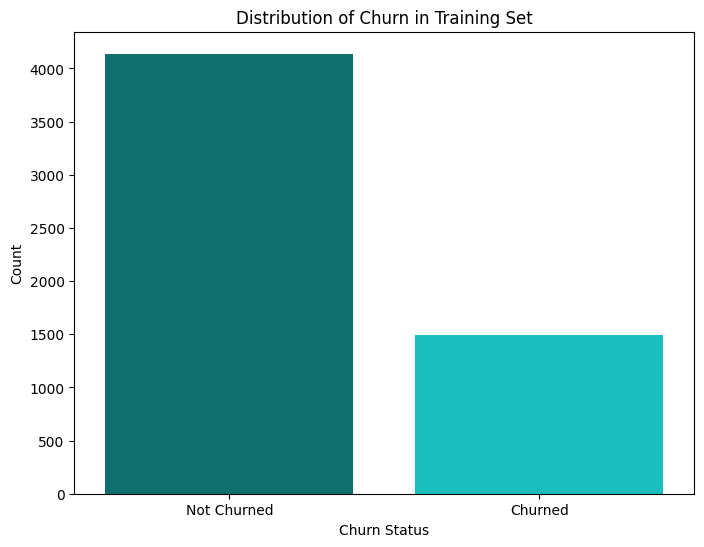

In [ ]:
teal_palette = ['#008080', '#00D9D9']

# Plot the distribution of 'Churn' in the training set
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train,  palette= teal_palette)
plt.title('Distribution of Churn in Training Set')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'])
plt.show()


<ipython-input-496-fa5f2a9db712>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette=teal_palette)


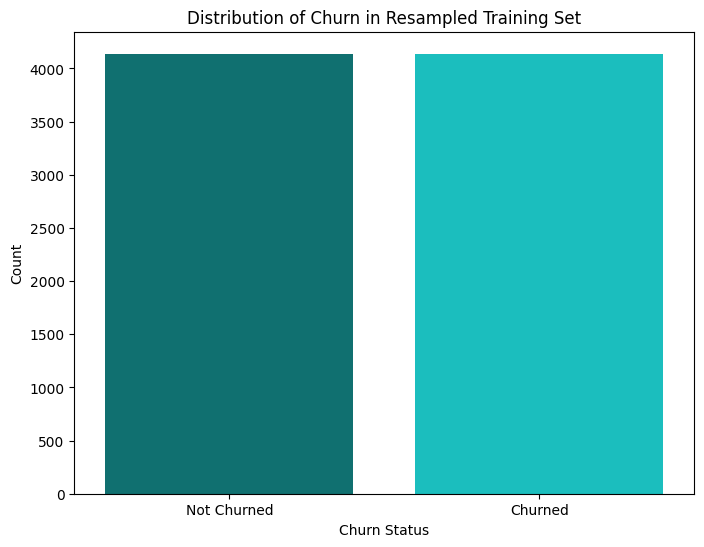

Distribution of Churn after oversampling:
Counter({0: 4138, 1: 4138})


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)

# Plot the distribution of 'Churn' in the resampled training set
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled, palette=teal_palette)
plt.title('Distribution of Churn in Resampled Training Set')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'])
plt.show()

# Print the distribution to verify
print("Distribution of Churn after oversampling:")
print(Counter(y_train_resampled))



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# creating the model
model = LogisticRegression()

# feeding the training data into the model
model.fit(X_train_resampled, y_train_resampled)

# predicting the test set results
y_pred = model.predict(X_test_final)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train_final, y_train))
print("Testing accuracy :", model.score(X_test_final, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.7305644302449414
Testing accuracy : 0.7558552164655784
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.76      0.62       373

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409

[[780 256]
 [ 88 285]]


In [ ]:
# Initialize an empty dictionary named 'Results' to store the evaluation results for different models.
Results = {'model':[], 'acurracy':[], 'precision':[], 'recall':[], 'f1-score':[]}

In [ ]:
# Converting the dictionary Results into a pandas DataFrame.
Results = pd.DataFrame(Results)
Results.head()

,model,acurracy,precision,recall,f1-score


In [ ]:
# Machine Learning Models Initialization
# Logistic Regression
lr = LogisticRegression()

# Random Forest
rf = RandomForestClassifier()

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Decision Tree Classifier
dt = DecisionTreeClassifier()

# Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Support Vector Machine
svm = SVC()

In [ ]:
# Set a random seed
import random

np.random.seed(42)
random.seed(42)

# Initialize the Results DataFrame
Results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

# List of model names
models = ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors', 'Decision Tree',
          'Gradient Boosting Classifier',  'Support Vector Machine']

# Fit the models and evaluate the performance
for model_name, model in zip(models, [lr, rf, knn, dt, gb, svm]):
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_final)

    print('Model:', model_name)
    print('===' * 18)

    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Accuracy:', round(accuracy_score(y_test, y_pred), 2))
    print('Precision:', round(precision_score(y_test, y_pred), 2))
    print('Recall:', round(recall_score(y_test, y_pred), 2))
    print('F1:', round(f1_score(y_test, y_pred), 2))
    print()

    # Create a DataFrame with the model name and the evaluation results
    R = pd.DataFrame([{
        'Model': model_name,
        'Accuracy': round(accuracy_score(y_test, y_pred), 2),
        'Precision': round(precision_score(y_test, y_pred), 2),
        'Recall': round(recall_score(y_test, y_pred), 2),
        'F1': round(f1_score(y_test, y_pred), 2)
    }])

    # Append the results to the DataFrame using pd.concat
    Results = pd.concat([Results, R], ignore_index=True)

# Print the results
print(Results)


Model: Logistic Regression
Confusion Matrix:
[[780 256]
 [ 88 285]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.76      0.62       373

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409

Accuracy: 0.76
Precision: 0.53
Recall: 0.76
F1: 0.62



<ipython-input-520-2fc62253863a>:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Results = pd.concat([Results, R], ignore_index=True)


Model: Random Forest
Confusion Matrix:
[[845 191]
 [145 228]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1036
           1       0.54      0.61      0.58       373

    accuracy                           0.76      1409
   macro avg       0.70      0.71      0.70      1409
weighted avg       0.77      0.76      0.77      1409

Accuracy: 0.76
Precision: 0.54
Recall: 0.61
F1: 0.58

Model: K-Nearest Neighbors
Confusion Matrix:
[[763 273]
 [115 258]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1036
           1       0.49      0.69      0.57       373

    accuracy                           0.72      1409
   macro avg       0.68      0.71      0.68      1409
weighted avg       0.77      0.72      0.74      1409

Accuracy: 0.72
Precision: 0.49
Recall: 0.69
F1: 0.57

Model: Decision Tree
Confusion Matrix:
[[804 232]
 [165 208]]
